In [55]:
#1_Define the necessary Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math


In [14]:
#2_Load Data set
data = fetch_california_housing()
#X, y = data.data, data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Display basic information about the dataset
print(df.info())
# Display summary statistics
print(df.describe())
# Check for missing values
print(df.isnull().sum())
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [99]:
# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting sets
print("All X_train shape:", X_train_full.shape)
print("All y_train shape:", y_train_full.shape)
print("X_test  shape:", X_test.shape)
print("y_test  shape:", y_test.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
print("X_train shape after extract Validation records:", X_train.shape)
print("y_train shape shape after extract Validation records:", y_train.shape)
print("X_valid :", X_valid.shape)
print("y_valid shape:", y_valid.shape)

All X_train shape: (16512, 8)
All y_train shape: (16512,)
X_test  shape: (4128, 8)
y_test  shape: (4128,)
X_train shape after extract Validation records: (13209, 8)
y_train shape shape after extract Validation records: (13209,)
X_valid : (3303, 8)
y_valid shape: (3303,)


In [48]:
scaler=StandardScaler()
X_tr_sc=scaler.fit_transform(X_train)
X_valid_sc=scaler.transform(X_valid)
X_test_sc=scaler.transform(X_test)
print(X_tr_sc.shape,X_valid_sc.shape,X_test_sc.shape)
print(y_train.shape, y_valid.shape,y_test.shape )

(13209, 8) (3303, 8) (4128, 8)
(13209,) (3303,) (4128,)


In [28]:
# Define Regression Models
linear_reg_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
ridge_cv_model = RidgeCV()
lasso_cv_model = LassoCV()
elastic_net_cv_model = ElasticNetCV()

In [29]:
#Define Pipeline for Regression modeling
linear_reg_pipeline = Pipeline([('scaler', StandardScaler()),('model', linear_reg_model)])
ridge_pipeline      = Pipeline([('scaler', StandardScaler()),('model', ridge_model)])
lasso_pipeline      = Pipeline([('scaler', StandardScaler()),('model', lasso_model)])
ridge_cv_pipeline   = Pipeline([('scaler', StandardScaler()),('model', ridge_cv_model)])
lasso_cv_pipeline   = Pipeline([  ('scaler', StandardScaler()),('model', lasso_cv_model)])
elastic_net_cv_pipeline = Pipeline([('scaler', StandardScaler()),('model', elastic_net_cv_model)])

In [35]:
#Training Models
linear_reg_pipeline.fit(X_tr_sc, y_train)
ridge_pipeline.fit(X_tr_sc, y_train)
lasso_pipeline.fit(X_tr_sc, y_train)
ridge_cv_pipeline.fit(X_tr_sc, y_train)
lasso_cv_pipeline.fit(X_tr_sc, y_train)
elastic_net_cv_pipeline.fit(X_tr_sc, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', ElasticNetCV())])

In [50]:
#Prediction Models
linear_reg_predictions = linear_reg_pipeline.predict(X_test_sc)
ridge_predictions = ridge_pipeline.predict(X_test_sc)
lasso_predictions = lasso_pipeline.predict(X_test_sc)
ridge_cv_predictions = ridge_cv_pipeline.predict(X_test_sc)
lasso_cv_predictions = lasso_cv_pipeline.predict(X_test_sc)
elastic_net_cv_predictions = elastic_net_cv_pipeline.predict(X_test_sc)

In [51]:
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mse_ridge_cv = mean_squared_error(y_test, ridge_cv_predictions)
mse_lasso_cv = mean_squared_error(y_test, lasso_cv_predictions)
mse_elastic_net_cv = mean_squared_error(y_test, elastic_net_cv_predictions)


In [52]:
#Compare Results#1
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mse_ridge_cv = mean_squared_error(y_test, ridge_cv_predictions)
mse_lasso_cv = mean_squared_error(y_test, lasso_cv_predictions)
mse_elastic_net_cv = mean_squared_error(y_test, elastic_net_cv_predictions)

In [56]:
#Compare Results#2
mae_linear_reg = mean_absolute_error(y_test, linear_reg_predictions)
mae_ridge = mean_absolute_error(y_test, ridge_predictions)
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
mae_ridge_cv = mean_absolute_error(y_test, ridge_cv_predictions)
mae_lasso_cv = mean_absolute_error(y_test, lasso_cv_predictions)
mae_elastic_net_cv = mean_absolute_error(y_test, elastic_net_cv_predictions)

In [57]:
#Compare Results#3
r2_linear_reg = r2_score(y_test, linear_reg_predictions)
r2_ridge = r2_score(y_test, ridge_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)
r2_ridge_cv = r2_score(y_test, ridge_cv_predictions)
r2_lasso_cv = r2_score(y_test, lasso_cv_predictions)
r2_elastic_net_cv = r2_score(y_test, elastic_net_cv_predictions)

In [59]:
print("MSE for Linear Regression:      ", mse_linear_reg)
print("MSE for Ridge Regression:       ", mse_ridge)
print("MSE for Lasso Regression:       ", mse_lasso)
print("MSE for RidgeCV Regression:     ", mse_ridge_cv)
print("MSE for LassoCV Regression:     ", mse_lasso_cv)
print("MSE for ElasticNetCV Regression:", mse_elastic_net_cv)

MSE for Linear Regression:       0.5544725485137046
MSE for Ridge Regression:        0.5544315375298826
MSE for Lasso Regression:        1.3105509256413768
MSE for RidgeCV Regression:      0.5540776518475818
MSE for LassoCV Regression:      0.552800439373909
MSE for ElasticNetCV Regression: 0.5531241327397635


In [60]:
print("MAE for Linear Regression:      ", mae_linear_reg)
print("MAE for Ridge Regression:       ", mae_ridge)
print("MAE for Lasso Regression:       ", mae_lasso)
print("MAE for RidgeCV Regression:     ", mae_ridge_cv)
print("MAE for LassoCV Regression:     ", mae_lasso_cv)
print("MAE for ElasticNetCV Regression:", mae_elastic_net_cv)

MAE for Linear Regression:       0.5334738187856252
MAE for Ridge Regression:        0.5334654692022267
MAE for Lasso Regression:        0.905064629601998
MAE for RidgeCV Regression:      0.5333962411937877
MAE for LassoCV Regression:      0.5333957615601144
MAE for ElasticNetCV Regression: 0.5333567873267222


In [61]:
print("R2 for Linear Regression:      ", r2_linear_reg)
print("R2 for Ridge Regression:       ", r2_ridge)
print("R2 for Lasso Regression:       ", r2_lasso)
print("R2 for RidgeCV Regression:     ", r2_ridge_cv)
print("R2 for LassoCV Regression:     ", r2_lasso_cv)
print("R2 for ElasticNetCV Regression:", r2_elastic_net_cv)

R2 for Linear Regression:       0.5768706123655901
R2 for Ridge Regression:        0.5769019086894882
R2 for Lasso Regression:        -0.00010832297613494468
R2 for RidgeCV Regression:      0.5771719661205476
R2 for LassoCV Regression:      0.5781466331862352
R2 for ElasticNetCV Regression: 0.5778996161318427


  Metric  Linear  Ridge  Lasso   RidgeCV   LassoCV   ElasticNetCV
0    MSE    0.55   0.55    1.31      0.55      0.55          0.55
1     R2    0.58   0.58   -0.00      0.58      0.58          0.58
2    MAE    0.53   0.53    0.91      0.53      0.53          0.53


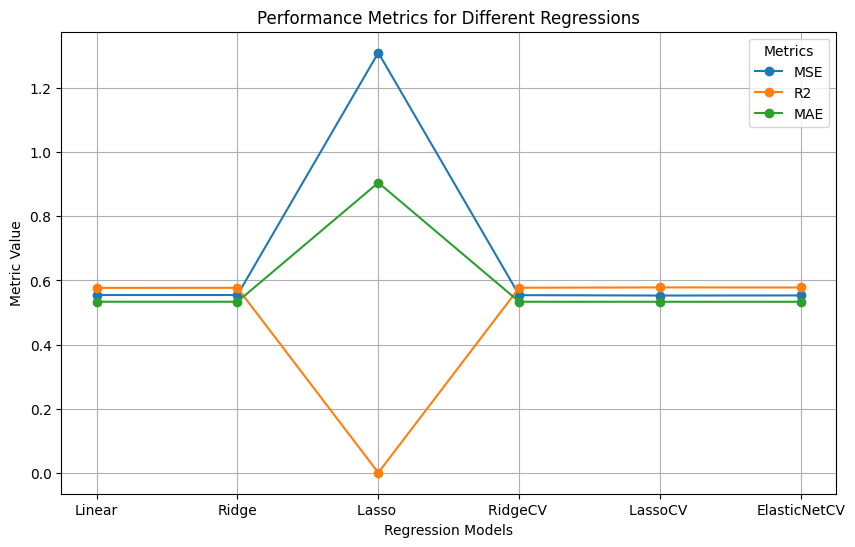

In [136]:
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'R2',"MAE"],
    'Linear': [mse_linear_reg, r2_linear_reg,mae_linear_reg],
    'Ridge': [mse_ridge, r2_ridge,mae_ridge],
    'Lasso ': [mse_lasso, r2_lasso,mae_lasso],
    'RidgeCV ': [mse_ridge_cv, r2_ridge_cv,mae_ridge_cv],
    'LassoCV ': [mse_lasso_cv, r2_lasso_cv,mae_lasso_cv],
    'ElasticNetCV': [mse_elastic_net_cv, r2_elastic_net_cv,mae_elastic_net_cv]
})
print(round(metrics_df,2))
# Set the Metric of Regression column as the index for better plotting
metrics_df.set_index('Metric', inplace=True)
# Plot the line graph
metrics_df.T.plot(marker='o', figsize=(10, 6))
plt.title('Performance Metrics for Different Regressions')
plt.ylabel('Metric Value')
plt.xlabel('Regression Models')
plt.grid(True)
plt.legend(title='Metrics')
plt.show()



In [122]:
# Create an ANN model with sigmoid activation
ann_sigmoid_model = Sequential([
                            Dense(128, activation='sigmoid', input_dim=X_train.shape[1]),
                            Dense(64, activation='sigmoid'),
                            Dense(1)
])
ann_sigmoid_model.compile(optimizer='adam', loss='mean_squared_error')

# Create an ANN model with tanh activation
ann_tanh_model = Sequential([
                            Dense(128, activation='tanh', input_dim=X_train.shape[1]),
                            Dense(64, activation='tanh'),
                            Dense(1)
])
ann_tanh_model.compile(optimizer='adam', loss='mean_squared_error')

# Define the pipeline with StandardScaler and ANN models
ann_sigmoid_pipeline = Pipeline([('scaler', StandardScaler()),('model', ann_sigmoid_model)])
ann_tanh_pipeline =    Pipeline([('scaler', StandardScaler()),('model', ann_tanh_model)])

# Fit and predict with the pipelines
History_S=ann_sigmoid_pipeline.fit(X_tr_sc, y_train)
History_T=ann_tanh_pipeline.fit(X_tr_sc, y_train)


ann_sigmoid_predictions = ann_sigmoid_pipeline.predict(X_test_sc).flatten()
ann_tanh_predictions = ann_tanh_pipeline.predict(X_test_sc).flatten()

# Evaluate performance
mse_ann_sigmoid = mean_squared_error(y_test, ann_sigmoid_predictions)
mse_ann_tanh = mean_squared_error(y_test, ann_tanh_predictions)

r2_ann_sigmoid=r2_score(y_test, ann_sigmoid_predictions)
r2_ann_tanh=r2_score(y_test, ann_sigmoid_predictions)
mae_ann_sigmoid=mean_absolute_error(y_test, ann_sigmoid_predictions)
mae_ann_tanh=mean_absolute_error(y_test, ann_sigmoid_predictions)
print("MSE for ANN with sigmoid activation:", mse_ann_sigmoid)
print("MSE for ANN with tanh activation:", mse_ann_tanh)


mat_ann=pd.DataFrame({
    'Metric': ['MSE', 'R2',"MAE"],
    "Sigmoid":[mse_ann_sigmoid, r2_ann_sigmoid,mae_ann_sigmoid]
    "tanh":[mse_ann_tanh, r2_ann_tanh,mae_ann_tanh]

})





129/129 [==============================] - 0s 2ms/step
MSE for ANN with sigmoid activation: 0.5786016762639564
MSE for ANN with tanh activation: 0.5035947608260969


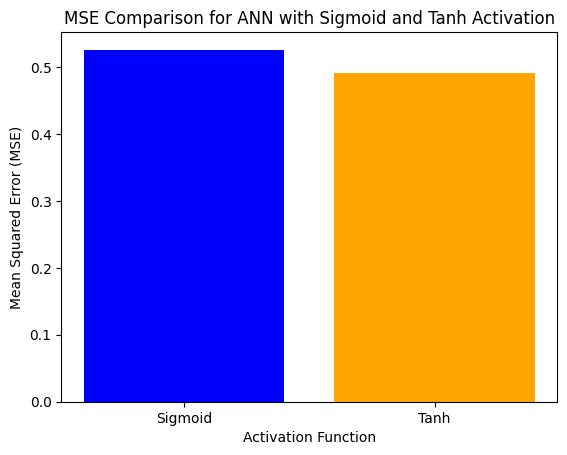

In [119]:
import matplotlib.pyplot as plt

# Assuming you have already executed the provided code

# Create a bar plot for MSE comparison
plt.bar(['Sigmoid', 'Tanh'], [mse_ann_sigmoid, mse_ann_tanh], color=['blue', 'orange'])
plt.xlabel('Activation Function')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for ANN with Sigmoid and Tanh Activation')
plt.show()


In [134]:
mat_ann=pd.DataFrame({
    'Metric': ['MSE', 'R2',"MAE"],
    "Sigmoid":[mse_ann_sigmoid, r2_ann_sigmoid,mae_ann_sigmoid],
    "tanh":[mse_ann_tanh, r2_ann_tanh,mae_ann_tanh]
})



        Linear  Ridge  Lasso   RidgeCV   LassoCV   ElasticNetCV
Metric                                                         
MSE       0.55   0.55    1.31      0.55      0.55          0.55
R2        0.58   0.58   -0.00      0.58      0.58          0.58
MAE       0.53   0.53    0.91      0.53      0.53          0.53
  Metric  Sigmoid  tanh
0    MSE     0.58  0.50
1     R2     0.56  0.56
2    MAE     0.56  0.56


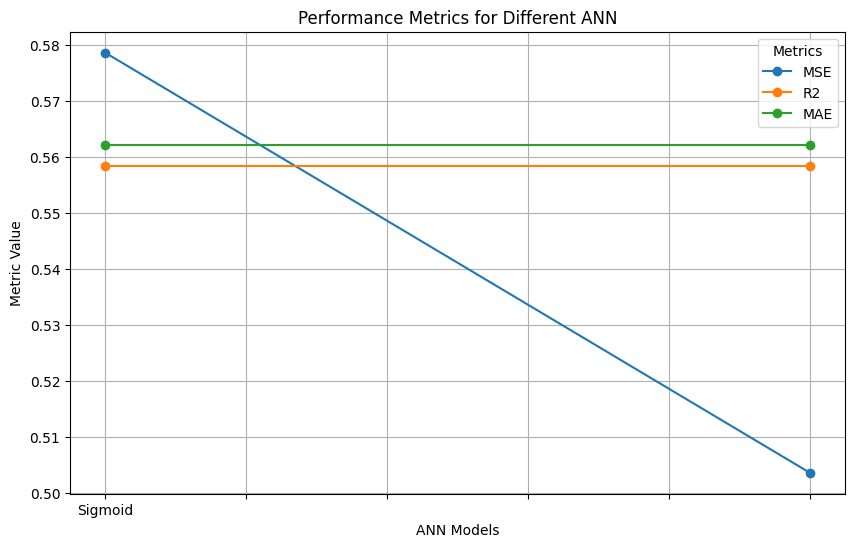

In [135]:
print(round(metrics_df,2))
print(round(mat_ann,2))
# Set the Metric of ANN column as the index for better plotting
mat_ann.set_index('Metric', inplace=True)
# Plot the line graph
mat_ann.T.plot(marker='o', figsize=(10, 6))
plt.title('Performance Metrics for Different ANN')
plt.ylabel('Metric Value')
plt.xlabel('ANN Models')
plt.grid(True)
plt.legend(title='Metrics')
plt.show()


  Metric  Linear  Ridge  Lasso   RidgeCV   LassoCV   ElasticNetCV  Sigmoid  \
0    MSE    0.55   0.55    1.31      0.55      0.55          0.55     0.58   
1     R2    0.58   0.58   -0.00      0.58      0.58          0.58     0.56   
2    MAE    0.53   0.53    0.91      0.53      0.53          0.53     0.56   

   tanh  
0  0.50  
1  0.56  
2  0.56  


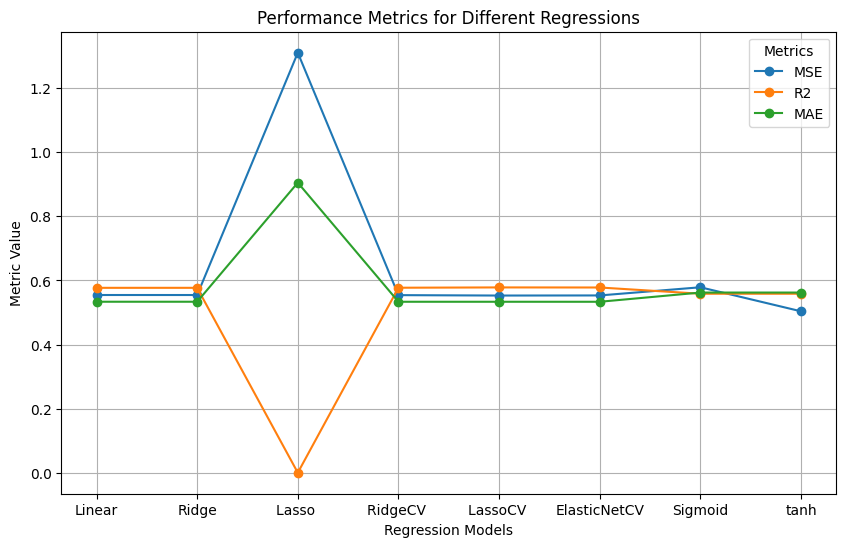

In [137]:
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'R2',"MAE"],
    'Linear': [mse_linear_reg, r2_linear_reg,mae_linear_reg],
    'Ridge': [mse_ridge, r2_ridge,mae_ridge],
    'Lasso ': [mse_lasso, r2_lasso,mae_lasso],
    'RidgeCV ': [mse_ridge_cv, r2_ridge_cv,mae_ridge_cv],
    'LassoCV ': [mse_lasso_cv, r2_lasso_cv,mae_lasso_cv],
    'ElasticNetCV': [mse_elastic_net_cv, r2_elastic_net_cv,mae_elastic_net_cv],
    "Sigmoid":[mse_ann_sigmoid, r2_ann_sigmoid,mae_ann_sigmoid],
    "tanh":[mse_ann_tanh, r2_ann_tanh,mae_ann_tanh]
})
print(round(metrics_df,2))
# Set the Metric of Regression column as the index for better plotting
metrics_df.set_index('Metric', inplace=True)
# Plot the line graph
metrics_df.T.plot(marker='o', figsize=(10, 6))
plt.title('Performance Metrics for Different Regressions')
plt.ylabel('Metric Value')
plt.xlabel('Regression Models')
plt.grid(True)
plt.legend(title='Metrics')
plt.show()

#Result
The application of a two-pipeline approach for assessing data using two algorithms, Regression and ANN, reveals fluctuations in Lasso regression. Notably, the Tanh activation function demonstrates superior performance with a lower MSE compared to other activation functions."
The better performance of the tanh activation function in the ANN model might suggest that non-linear relationships captured by tanh are more suitable for this dataset.